### Modeling with Linear Regression - This notebook will be a walk-through of Lesson 1 page 6 & 7

In [1]:
#Regression allows you to write an equation that models the relationship
#between the independent variable, x, and the dependent variable, y. 
#You can think of x as a predictor, and y as the outcome you are trying 
#to predict. When the model is created, it allows you to predict the 
#value of y for any given value of x.
#(Background from page 2 of LMS)

In [41]:
#### Install Packages
install.packages("car")
install.packages("caret")
install.packages("gvlma")
install.packages("predictmeans")
install.packages("e1071")
install.packages("lmtest")
defaultW <- getOption("warn") 
options(warn = -1)

In [42]:
#Load Packages
library("car")
library("caret")
library("gvlma")
library("predictmeans")
library("e1071")
library("lmtest")
defaultW <- getOption("warn") 
options(warn = -1)

In [4]:
Manatee= read.csv('../Data/manatees.csv')

In [5]:
head(Manatee)

,PowerBoats,ManateeDeaths
,<int>,<int>
1,436,14
2,449,21
3,470,18
4,487,19
5,502,24
6,501,18


#### Question Setup:
#### Do the number of powerboats registered in Florida impact the number of manatees killed there by powerboats each year?

In [6]:
#Test Assumptions

In [7]:
#Test for Linearity: Look at a scatterplot to see if there is a linear
# relationship between the 2 variables

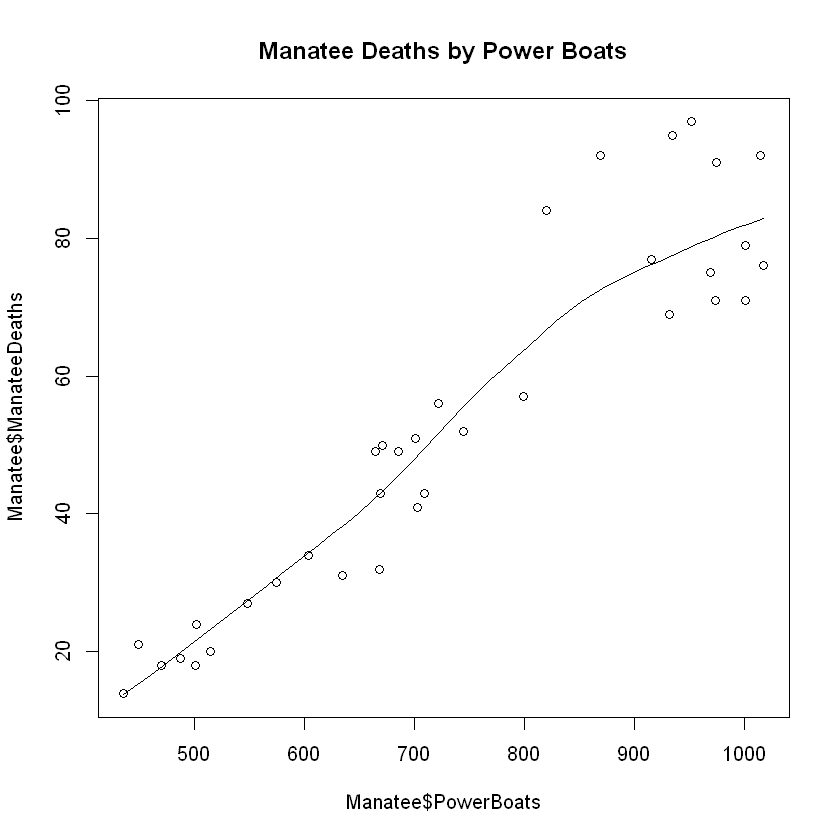

In [8]:
scatter.smooth(x=Manatee$PowerBoats, y=Manatee$ManateeDeaths, main="Manatee Deaths by Power Boats")

In [9]:
#This passes the test of linearity!

In [10]:
#Testing for Homoscedasticity
#Create the linear model(basic regression model)
#DV goes before the ~ then IV, then specify your data
#lm will stand for linear model
lmMod <- lm(ManateeDeaths~PowerBoats, data=Manatee)

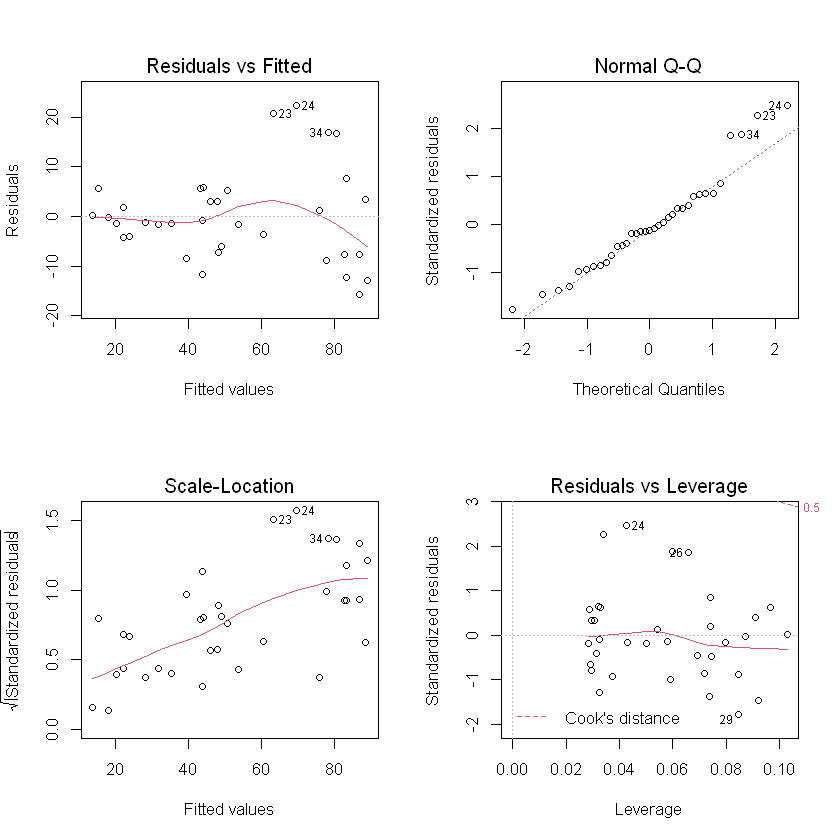

In [11]:
#creating graphs from the model above
par(mfrow=c(2,2))
plot(lmMod)

In [12]:
#above shows results in a graph regarding the residuals
#can also test for homoscedasticity with the Breush-Pagan
#test or the Non-Constant Variance (NCV) test.

In [13]:
#Breush-Pagan test:
lmtest::bptest(lmMod)


	studentized Breusch-Pagan test

data:  lmMod
BP = 7.8867, df = 1, p-value = 0.00498


In [14]:
#p value = .004. Since this is less than .05, it means it is 
#significant, and having a significant Breush-Pagan test means 
#that you unfortunately have heteroscedasticity and would not meet
#the assumption of homoscedasticity

In [15]:
#Non-Constant Variance(NCV) test:
car::ncvTest(lmMod)

Non-constant Variance Score Test 
Variance formula: ~ fitted.values 
Chisquare = 9.037421, Df = 1, p = 0.0026451

In [16]:
#confirms another significant p value, the data is heteroscedastic
#and does not meet the assumption of homoscedasticiy

In [17]:
#Since the data did not meet that assumption, we can try to transform 
#DV using a box-cox transformation from the caret library
BCMod1 <- caret::BoxCoxTrans(Manatee$ManateeDeaths)
print(BCMod1)

Box-Cox Transformation

35 data points used to estimate Lambda

Input data summary:
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   14.0    30.5    50.0    52.8    75.5    97.0 

Largest/Smallest: 6.93 
Sample Skewness: 0.173 

Estimated Lambda: 0.5 



In [18]:
#Now we need to to re-test your transformed variable, 
#you need to bind it to the current dataset, using the function cbind():
#This creates a new variable, Manatee1, that is storing the info from
#the cbind() function of the Manatee data creating a new model from the
#predicted data from the transformed DV using the box-cox transformation
Manatee1 <- cbind(Manatee, newLM=predict(BCMod1, Manatee$ManateeDeaths))

In [19]:
#Now we are going to create a new linear model using our tranformed DV
#testing it again with either the Breush-Pagan test or the NCV test
#Here it is testing the Breush-Pagan test
lmMod_BCDV <- lm(newLM~PowerBoats, data=Manatee1)
lmtest::bptest(lmMod_BCDV)


	studentized Breusch-Pagan test

data:  lmMod_BCDV
BP = 5.6078, df = 1, p-value = 0.01788


In [20]:
#Here the results are still significant, as the p value is 0.01788 
#For learning purposes we will continue

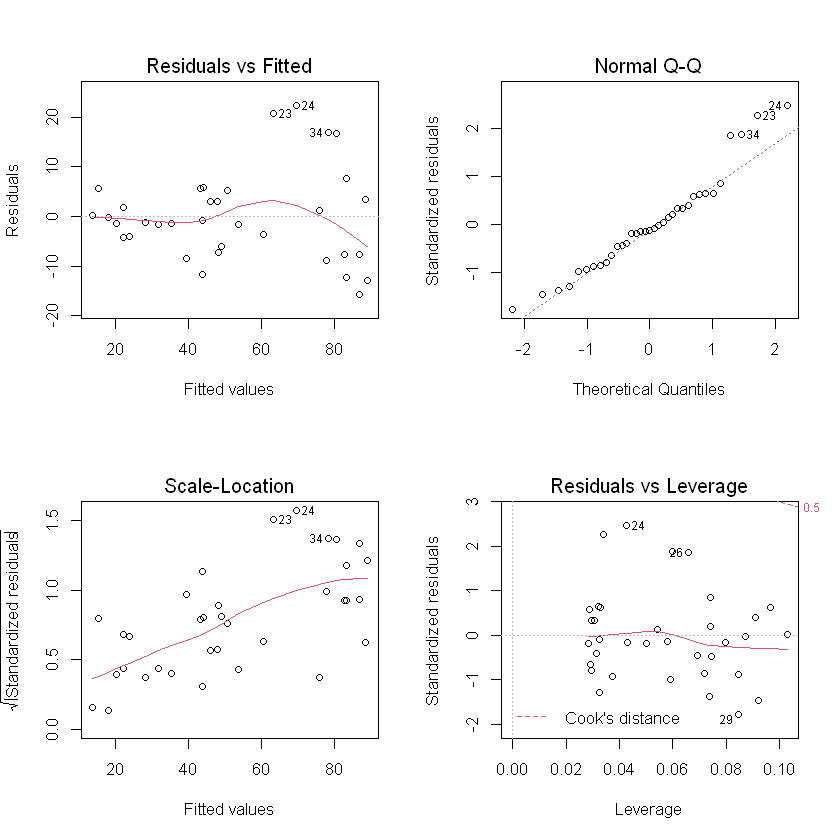

In [21]:
#Testing for Homogeneity of Variance
#### reprinting the plots from above to examine:
par(mfrow=c(2,2))
plot(lmMod)

In [22]:
#The above plots provide useful information about homogeneity of 
#variance, or how evenly your data is distributed. All you need to do 
#is to see whether your data forms a nice box, or whether it is cone 
#shaped at either end. In this case, the residual plots you generated 
#above (repeated here for your convenience) show no cone, so you have 
#passed the assumption of homogeneity of variance.

### Library gvlma

In [23]:
#Using the gvlma library can offer an overview of the assumptions
#but it is not always accurate so you still need to run each 
#assumption but it can be helpful for general overviews of the data
gvlma(lmMod_BCDV)


Call:
lm(formula = newLM ~ PowerBoats, data = Manatee1)

Coefficients:
(Intercept)   PowerBoats  
   -1.76474      0.01872  


ASSESSMENT OF THE LINEAR MODEL ASSUMPTIONS
USING THE GLOBAL TEST ON 4 DEGREES-OF-FREEDOM:
Level of Significance =  0.05 

Call:
 gvlma(x = lmMod_BCDV) 

                     Value p-value                   Decision
Global Stat        12.1803 0.01606 Assumptions NOT satisfied!
Skewness            1.1918 0.27496    Assumptions acceptable.
Kurtosis            0.1569 0.69207    Assumptions acceptable.
Link Function       6.9611 0.00833 Assumptions NOT satisfied!
Heteroscedasticity  3.8705 0.04914 Assumptions NOT satisfied!

In [24]:
#From the LMS definitions:
#Global Stat: This indicates whether the relationship between your x 
#and y data is linear.If you recall from the scatterplot above, the 
#relationship is linear, so this is a great example of why you do not 
#want to fully trust GVLMA.

#Skewness: This is a measure of whether your data is normally distributed 
#horizontally.

#Kurtosis: This is an indicator of whether your data is normally 
#distributed vertically.

#Link Function: This tests whether your variable is continuous. If 
#this has been violated, then data is categorical and analyses such 
#as logistic regression should be used instead.

#The model has not satisfied this assumption according to GVLMA, 
#but guess what? Both the number of Power Boats and the number of 
#Manatee Deaths are continuous, not categorical. 

#Make sure to investigate GVLMA results carefully.

#Heteroscedasticity: This is an indicator of whether your residuals 
#are constant. If you fail this, you fail the assumption of 
#homoscedasticity discussed above.

### Screening for Outliers: 
### Testing for Outliers in X Space

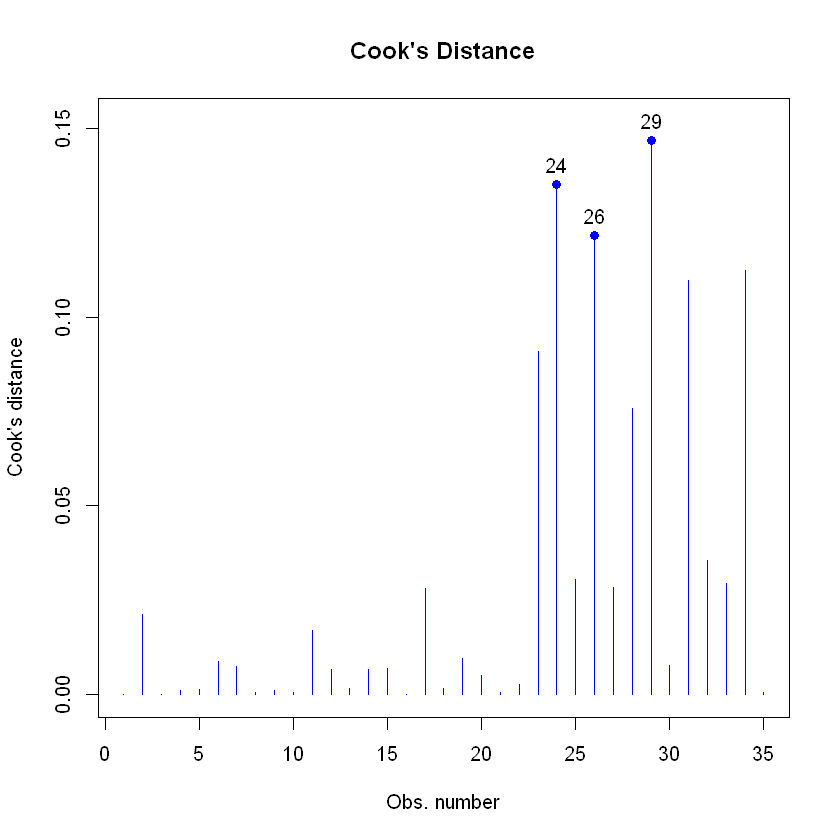

In [25]:
#using the Cook's distance values with the predictmeans library
#will generate a plot that shows outliers in x space
 CookD(lmMod, group=NULL, plot=TRUE, idn=3, newwd=FALSE)

#I want to make an important note here, the code above has newwd=FALSE
#and that is how to generate this plot using R in jupyter notebook/lab
#in R studio, the code needs to reflect what is in the lesson newwd=TRUE

In [26]:
#we can see that 24, 26, and 29 are outliers

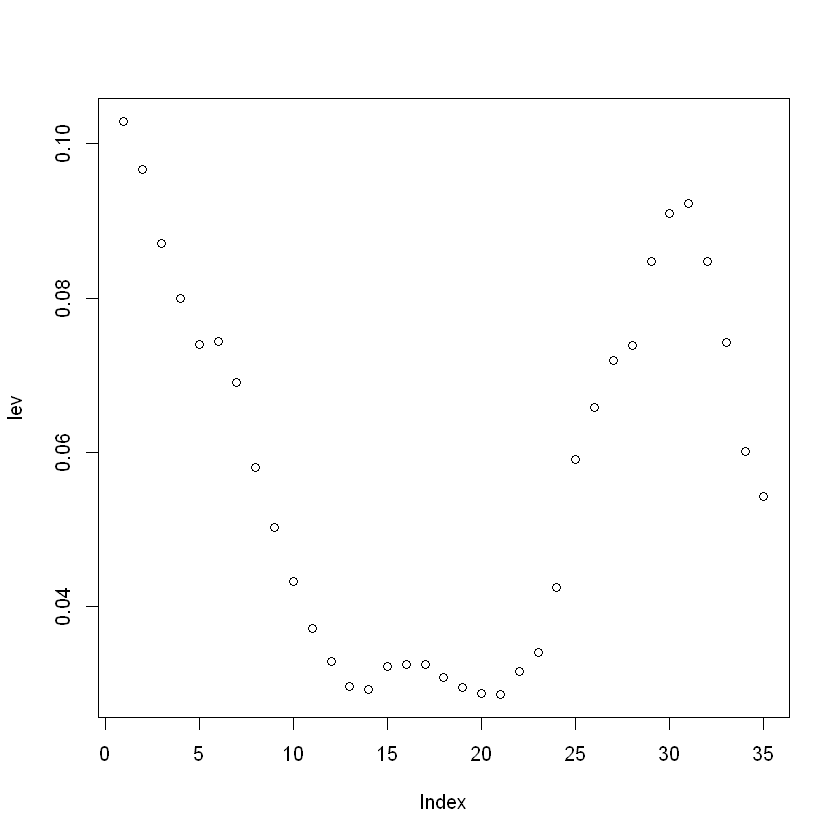

In [27]:
#We will also test for leverage values using the hat function
#anything that has a leverage value of .2-.5 is a moderate problem 
#anything over .5 is a big problem
lev = hat(model.matrix(lmMod))
plot(lev)

In [28]:
#the above shows there are no leverage values over .2 but if you would
#like to see this numerically to be on the safe side:
Manatee[lev>.2,]

PowerBoats,ManateeDeaths
<int>,<int>


In [29]:
#nothing is printed here indicating no leverage over .2

### Testing for Outliers in y Space

In [30]:
#This is done using the studentized deleted residual
#caluated using n-1 meaning there is one deleted residual
#We will use the car library for the outlierTest function:
car::outlierTest(lmMod)

No Studentized residuals with Bonferroni p < 0.05
Largest |rstudent|:
   rstudent unadjusted p-value Bonferroni p
24 2.691645           0.011213      0.39245

In [31]:
#The above code tests for the very furthest outlier. If the
#Bonferroni p value is significant (i.e. less than .05), then it is 
#likely that you have at least one outlier. 

#Look at the rstudent result, this is the raw studentized deleted residual. If this 
#If the value is over 2.5 or 3ish, you have a problem with outliers in 
#the y space. Our value is 2.69, but the bonferroni p value is not 
#significant so we will leave it alone and gather there are no outliers
#in the y space.

### Testing for Outliers in x and y Space

In [32]:
#To test for influential values we will look at two metrics:
#DFFITS & DFBETAS using the function influence.measures
summary(influence.measures(lmMod))

Potentially influential observations of
	 lm(formula = ManateeDeaths ~ PowerBoats, data = Manatee) :

   dfb.1_ dfb.PwrB dffit cov.r   cook.d hat  
1   0.01  -0.01     0.01  1.19_*  0.00   0.10
23 -0.07   0.18     0.46  0.78_*  0.09   0.03
24 -0.20   0.32     0.57  0.74_*  0.14   0.04


In [33]:
#the row numbers of any values that may be outliers are shown on the 
#far left. Here we see row 1, 23, & 24 
#The column named dfb.1_ is for DFBETAS, and the one named 
#dffit is for DFFITS. If a DFFITS or DFBETAS value is greater 1, you 
#most likely have a problem with outliers that are influential.
#There are no values greater than 1 for those 3 points so there are
#no influential outliers in the data

### Interpreting the Output

In [34]:
#call the summary of the created model:
summary(lmMod_BCDV)


Call:
lm(formula = newLM ~ PowerBoats, data = Manatee1)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.11978 -0.95827 -0.05081  0.75875  2.74620 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.764745   0.842078  -2.096   0.0439 *  
PowerBoats   0.018718   0.001106  16.929   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.226 on 33 degrees of freedom
Multiple R-squared:  0.8967,	Adjusted R-squared:  0.8936 
F-statistic: 286.6 on 1 and 33 DF,  p-value: < 2.2e-16


In [35]:
#Examine the F-statistic in the last line
#This tells you the F Statistic for the overall model as well as the 
#p value for the overall model. The larger the F statistic, the more 
#likely it is to be significant, at 286.6, you would expect p to be 
#significant. As it is p = 2.2e-16 which means 16 decimal places to 
#the left which would be a very small value
#Notice how the three *** at the end of the PowerBoats variable,
#that is showing the result if greatly signficant, p < .001 

#The results confirm to reject the null hypothesis, since the p value
#is less than .05. There is sufficient evidence to suggest that there 
#is a linear relationship between the number of powerboats registered 
#in Florida and the number of manatees killed by powerboats. 
#This conclusion makes sense as there are more boats on the water, 
#it seems probable that this may be related to the number of manatees
#killed.


### Multiple R-squared

In [36]:
#To determine how much of a predictor this is, look at the Multiple R-
#squared value and an adjusted R-squared value.

#Multiple R-squared is a measure of how well the regression line fits
#the data.
#the practical interpretation would be something like: 
#"89% of the variation in the number of manatee deaths each year can be
#explained by the number of power boats. The other 13% is due to error 
#or other variables not accounted for in this model."

### Adjusted R-squared

In [37]:
#Measure of R squared that adjusts for the number of terms in the model.
#For models with only one term (i.e. the simple linear regression we
#just completed), there will not be much difference between the R 
#squared and the adjusted R square.

### Interpreting Non-Transformed Regression Output

In [38]:
summary(lmMod)


Call:
lm(formula = ManateeDeaths ~ PowerBoats, data = Manatee)

Residuals:
    Min      1Q  Median      3Q     Max 
-15.736  -6.642  -1.239   4.374  22.309 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -42.525657   6.347072   -6.70 1.25e-07 ***
PowerBoats    0.129133   0.008334   15.49  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 9.237 on 33 degrees of freedom
Multiple R-squared:  0.8792,	Adjusted R-squared:  0.8755 
F-statistic: 240.1 on 1 and 33 DF,  p-value: < 2.2e-16


In [39]:
#The practical interpretation of the slope (b1) is this: For every 
#thousand more power boats that are registered in the state of Florida,
#there is a predicted additional 0.129 manatee deaths due to collisions
#between boats and manatees. Another way to look at it is by stating 
#that for every additional 1000 power boats registered, there can be 
#an expected increase of 1 manatee death. 

In [40]:
#Most of the explanation verbage from this notebook is from the lMS
#hope you enjoyed following along in this notebook! <3 Mia